In [2]:
import fredpy as fp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import dash
from flask import Flask, render_template_string
from dash import dcc, html
from plotly.subplots import make_subplots 
import pandas as pd
from dash import dash_table

In [3]:
# Load FRED API key
fp.api_key = fp.load_api_key('fred_api_key.txt')

In [5]:
# Ensure the observation_date is set to today's date or earlier
observation_date = '2024-07-05'

# Download data
stock_market = fp.series('SP500', observation_date=observation_date).data
house_prices = fp.series('CSUSHPINSA', observation_date=observation_date).data
bond_yields = fp.series('DGS10', observation_date=observation_date).data
production_manufacturing = fp.series('INDPRO', observation_date=observation_date).data
retail_sales = fp.series('RSAFS', observation_date=observation_date).data
interest_rates = fp.series('FEDFUNDS', observation_date=observation_date).data
gdp_growth_rates = fp.series('GDP', observation_date=observation_date).data
cpi = fp.series('CPIAUCSL', observation_date=observation_date).data
currency_strength = fp.series('DTWEXBGS', observation_date=observation_date).data
labour_market = fp.series('UNRATE', observation_date=observation_date).data
commodity_prices = fp.series('PPIACO', observation_date=observation_date).data

# Combine data into a single DataFrame
df = pd.DataFrame({
    'Stock Market': stock_market,
    'House Prices': house_prices,
    'Bond Yields': bond_yields,
    'Production and Manufacturing Statistics': production_manufacturing,
    'Retail Sales': retail_sales,
    'Interest Rates': interest_rates,
    'GDP Growth Rates': gdp_growth_rates,
    'Consumer Price Index (CPI)': cpi,
    'Currency Strength and Stability': currency_strength,
    'Labour Market Statistics': labour_market,
    'Commodity Prices': commodity_prices
})


In [6]:
# Resample to quarterly frequency where necessary
df = df.resample('QE').mean()

# Drop rows with any NaN values
df.dropna(how='any', inplace=True)

# Optionally, save the DataFrame to a CSV file
df.to_csv('economic_indicators.csv')

In [7]:
df.index = pd.to_datetime(df.index)
df.reset_index(inplace=True)
df

,date,Stock Market,House Prices,Bond Yields,Production and Manufacturing Statistics,Retail Sales,Interest Rates,GDP Growth Rates,Consumer Price Index (CPI),Currency Strength and Stability,Labour Market Statistics,Commodity Prices
0,2014-09-30,1975.815410,167.274333,2.499531,102.789767,438042.333333,0.090000,17804.228,237.478333,94.750314,6.066667,207.133333
1,2014-12-31,2009.344375,166.672667,2.275968,103.391333,439951.000000,0.100000,17912.079,236.888333,99.312500,5.700000,200.433333
2,2015-03-31,2063.689836,166.986667,1.968852,102.238600,437823.333333,0.110000,18063.529,235.355000,105.473017,5.533333,191.533333
3,2015-06-30,2101.829048,171.755333,2.164375,100.817267,445217.666667,0.123333,18279.784,236.960000,105.997159,5.433333,193.033333
4,2015-09-30,2027.200000,174.824000,2.223125,100.879600,449467.000000,0.136667,18401.626,237.855000,109.626666,5.100000,191.633333
5,2015-12-31,2052.311875,175.098667,2.190484,99.513333,448747.000000,0.160000,18435.137,237.837000,111.474224,5.033333,185.566667
6,2016-03-31,1951.224918,175.634333,1.914262,98.841933,449912.000000,0.360000,18525.933,237.689333,113.609032,4.900000,182.000000
7,2016-06-30,2075.131563,180.248000,1.750156,98.487967,454949.000000,0.373333,18711.702,239.590333,110.915956,4.933333,185.366667
8,2016-09-30,2162.056875,183.533000,1.564375,98.747700,459223.000000,0.396667,18892.639,240.607333,112.051288,4.900000,187.066667
9,2016-12-31,2184.878571,184.210667,2.138689,98.702867,464148.333333,0.450000,19089.379,242.134667,115.863043,4.766667,187.066667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     39 non-null     datetime64[ns]
 1   Stock Market                             39 non-null     float64       
 2   House Prices                             39 non-null     float64       
 3   Bond Yields                              39 non-null     float64       
 4   Production and Manufacturing Statistics  39 non-null     float64       
 5   Retail Sales                             39 non-null     float64       
 6   Interest Rates                           39 non-null     float64       
 7   GDP Growth Rates                         39 non-null     float64       
 8   Consumer Price Index (CPI)               39 non-null     float64       
 9   Currency Strength and Stability          39 n

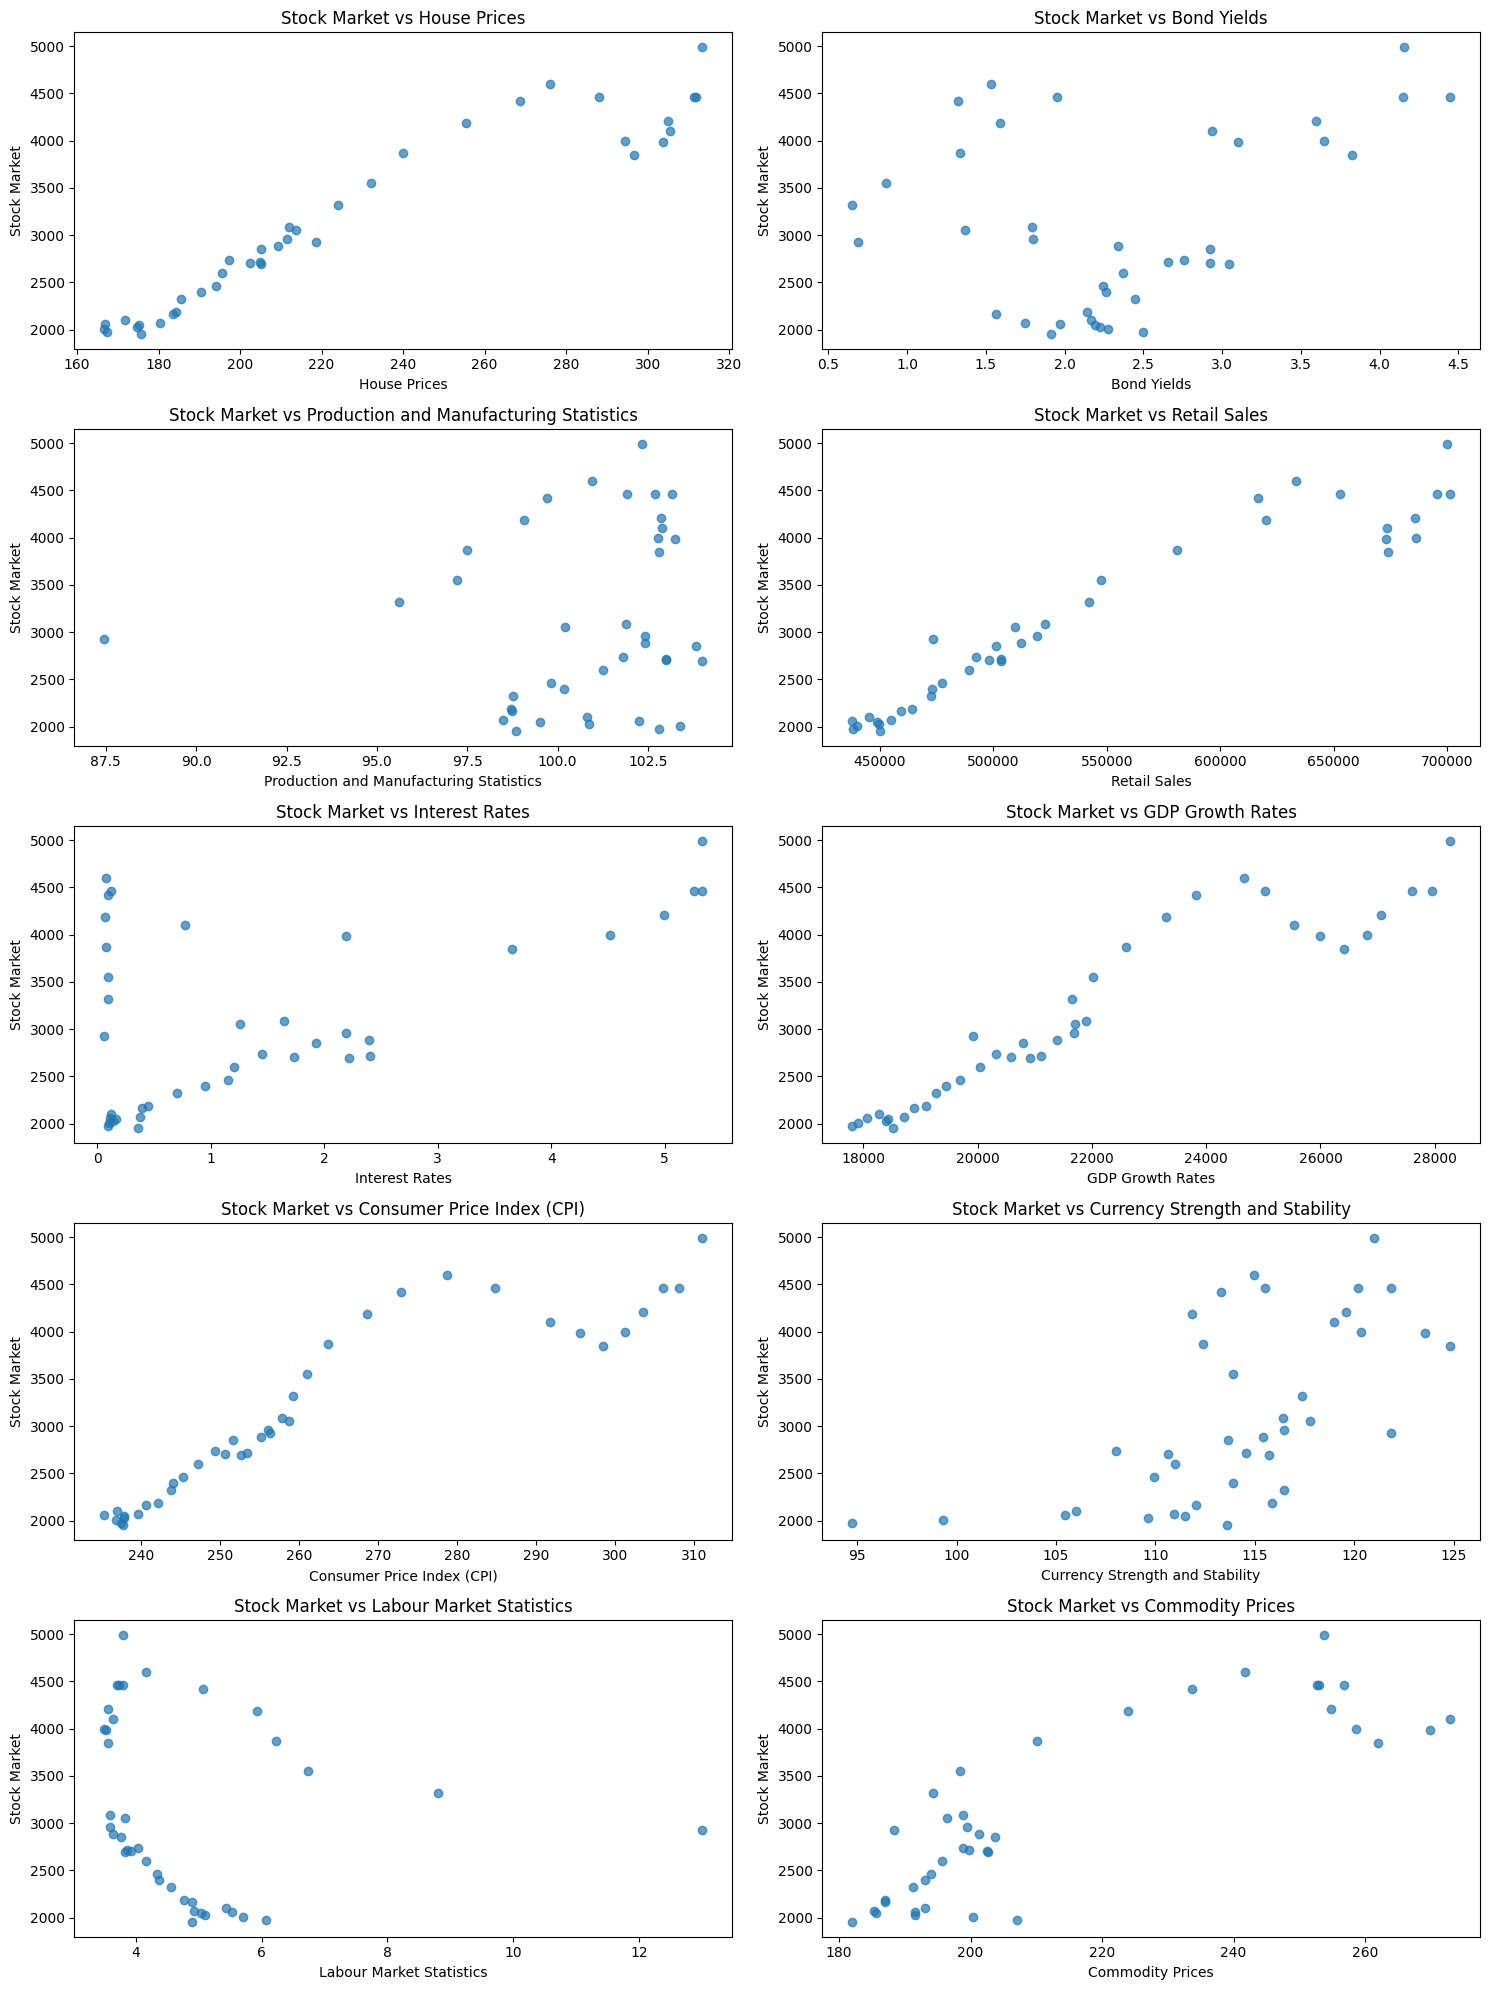

In [9]:
# List of macroeconomic indicators
indicators = [
    "House Prices", 
    "Bond Yields", 
    "Production and Manufacturing Statistics", 
    "Retail Sales", 
    "Interest Rates", 
    "GDP Growth Rates", 
    "Consumer Price Index (CPI)", 
    "Currency Strength and Stability", 
    "Labour Market Statistics", 
    "Commodity Prices"
]

# Set the size of the figure
plt.figure(figsize=(15, 20))

# Create scatter plots for each indicator against the stock market
for i, indicator in enumerate(indicators, 1):
    plt.subplot(5, 2, i)
    plt.scatter(df[indicator], df["Stock Market"], alpha=0.7)
    plt.title(f'Stock Market vs {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('Stock Market')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [10]:
# Load the benchmark data
benchmark_file_path = '/Users/d.o.npat/Desktop/FinBud/stock/benchmark.csv'
benchmark_df = pd.read_csv(benchmark_file_path)

# Ensure the date column in benchmark_df is in datetime format
benchmark_df['Date'] = pd.to_datetime(benchmark_df['Date'])


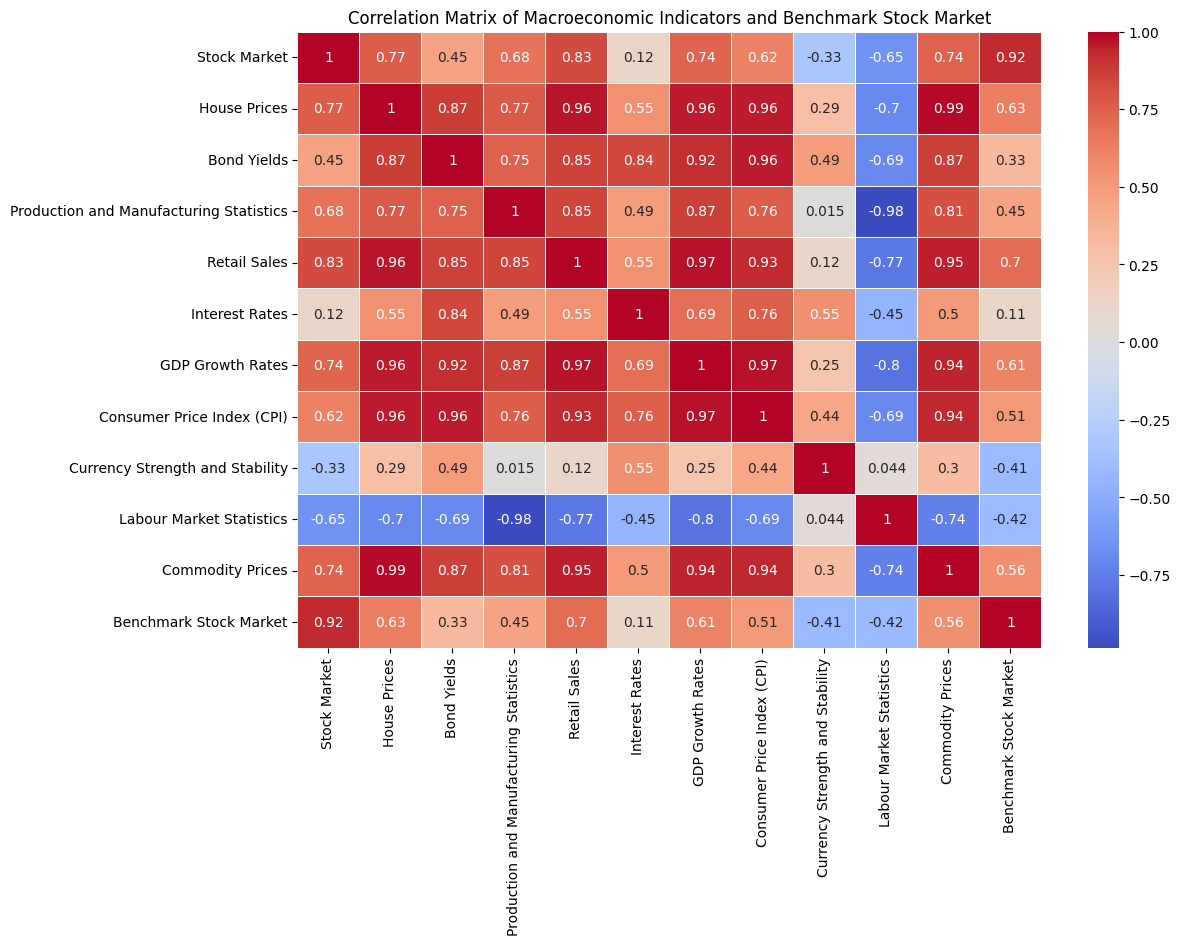

In [11]:
merged_df = pd.merge(df, benchmark_df[['Date', 'Adj Close']], left_on='date', right_on='Date', how='inner')

# Drop the extra Date column from the benchmark data
merged_df = merged_df.drop(columns=['Date'])
# Drop the extra Date column from the benchmark data
merged_df = merged_df.drop(columns=['date'])

# Rename 'Adj Close' to 'Benchmark Stock Market' for clarity
merged_df = merged_df.rename(columns={'Adj Close': 'Benchmark Stock Market'})

# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Macroeconomic Indicators and Benchmark Stock Market')
plt.show()

"""
Benchmark Stock Market:

Stock Market: High positive correlation (0.92) indicating that changes in the stock market index are strongly aligned with the benchmark stock market.
House Prices: High positive correlation (0.87) suggesting that rising house prices tend to be associated with increases in the benchmark stock market.
Retail Sales: High positive correlation (0.90) indicating that higher retail sales are associated with higher benchmark stock market values.
GDP Growth Rates: High positive correlation (0.85) suggesting that higher GDP growth rates are positively associated with the benchmark stock market.
Commodity Prices: High positive correlation (0.81) indicating that higher commodity prices tend to be associated with higher benchmark stock market values.
Consumer Price Index (CPI): Moderate positive correlation (0.79) suggesting that higher inflation (as measured by CPI) is moderately associated with the benchmark stock market.

Other Indicators:

House Prices and Retail Sales: Very high correlation (0.96) indicating that house prices and retail sales tend to move together.
House Prices and GDP Growth Rates: Very high correlation (0.96) suggesting a strong relationship between house prices and GDP growth rates.
Retail Sales and GDP Growth Rates: Very high correlation (0.97) indicating that higher retail sales are strongly associated with higher GDP growth rates.
Interest Rates: Low to moderate correlations with the benchmark stock market (0.12) and other macroeconomic indicators, suggesting that interest rates may not have as strong a direct relationship with these variables in this dataset.
Labour Market Statistics: Negative correlation with the benchmark stock market (-0.61) and several other indicators, suggesting an inverse relationship in this context.
Negative Correlations:

Currency Strength and Stability: Negative correlation with the benchmark stock market (-0.085), indicating that a stronger currency might have a slight inverse relationship with the benchmark stock market.
Labour Market Statistics: Negative correlations with several indicators, including house prices (-0.70), retail sales (-0.77), and GDP growth rates (-0.80), indicating that better labor market statistics might be inversely related to these variables.
"""

In [26]:
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['date'].min(),
        end_date=df['date'].max(),
        display_format='YYYY-MM-DD'
    ),
    dash_table.DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in df.columns],
        data=df.to_dict('records')
    )
])

@app.callback(
    dash.dependencies.Output('table', 'data'),
    [dash.dependencies.Input('date-picker-range', 'start_date'),
     dash.dependencies.Input('date-picker-range', 'end_date')]
)
def update_table(start_date, end_date):
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    return filtered_df.to_dict('records')

if __name__ == '__main__':
    app.run_server(debug=True, port=5055)